# Data Set Information :
This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from plotnine import *
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv(r"D:\ml2\project\wine-clustering.csv")
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

# Data exploration

In [3]:
print("the shape of Data is : ",df.shape)

the shape of Data is :  (178, 13)


# Attribute Information:
* **Alcohol**
* **Malic acid**
* **Ash**
* **Alcalinity of ash**
* **Magnesium**
* **Total phenols**
* **Flavanoids**
* **Nonflavanoid phenols**
* **Proanthocyanins**
* **Color intensity**
* **Hue**
* **OD280/OD315 of diluted wines**
* **Proline**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.describe().T

count        mean         std     min       25%  \
Alcohol               178.0   13.000618    0.811827   11.03   12.3625   
Malic_Acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Ash_Alcanity          178.0   19.494944    3.339564   10.60   17.2000   
Magnesium             178.0   99.741573   14.282484   70.00   88.0000   
Total_Phenols         178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid_Phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins       178.0    1.590899    0.572359    0.41    1.2500   
Color_Intensity       178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD280                 178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   

                          50%       75%      max  
Alcohol                13.050   13.6775    14.83  
Malic_Acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Ash_Alcanity           19.500   21.5000    30.00  
Magnesium              98.000  107.0000   162.00  
Total_Phenols           2.355    2.8000     3.88  
Flavanoids              2.135    2.8750     5.08  
Nonflavanoid_Phenols    0.340    0.4375     0.66  
Proanthocyanins         1.555    1.9500     3.58  
Color_Intensity         4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD280                   2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00

In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# This function takes the numerical column as the input and returns the boxplots and histogram 


def histogram_boxplot(feature, figsize=(10,5)):
   
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2,  color='c') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='r', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

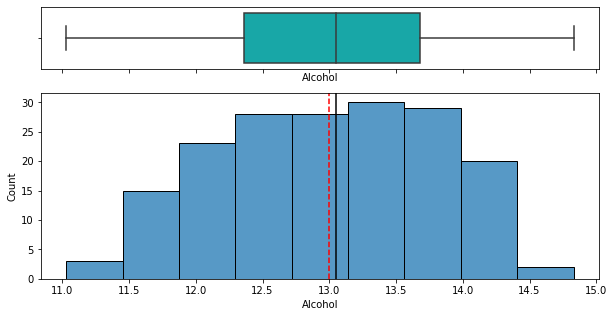

In [9]:
# ditribution of Alcohol
histogram_boxplot(df['Alcohol'])

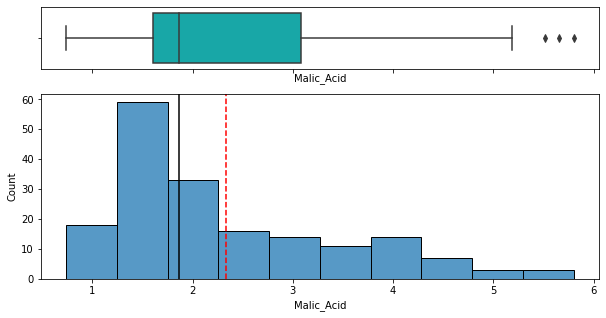

In [10]:
# ditribution of Malic_Acid
histogram_boxplot(df['Malic_Acid'])

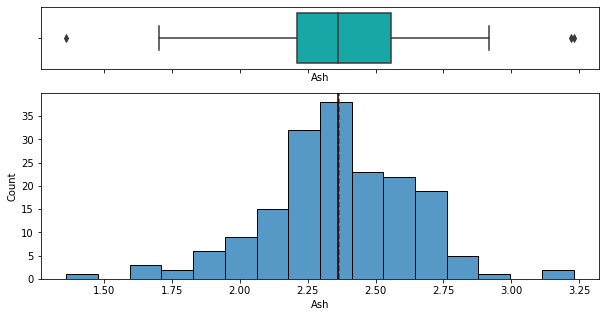

In [11]:
# ditribution of Ash
histogram_boxplot(df['Ash'])

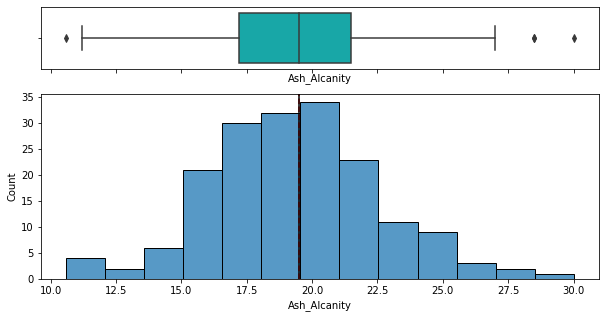

In [12]:
# ditribution of Ash_Alcanity
histogram_boxplot(df['Ash_Alcanity'])

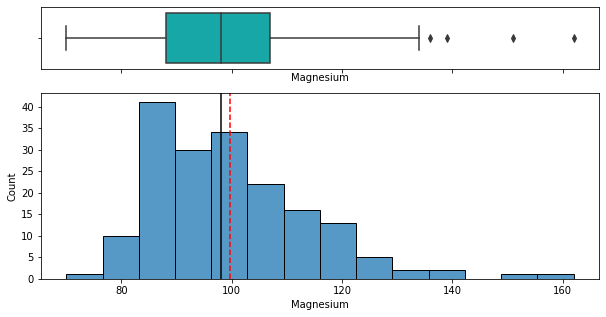

In [13]:
# ditribution of Magnesium
histogram_boxplot(df['Magnesium'])

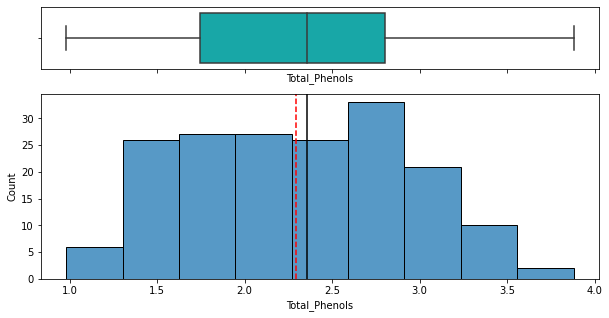

In [14]:
# ditribution of Total_Phenols 
histogram_boxplot(df['Total_Phenols'])

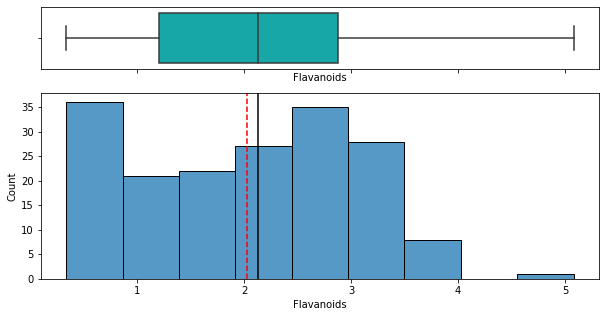

In [15]:
# ditribution of  Flavanoids   
histogram_boxplot(df['Flavanoids'])

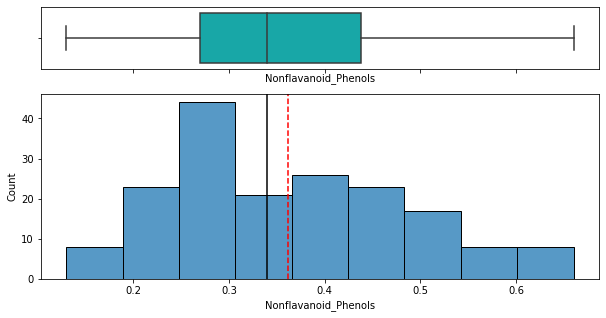

In [16]:
# ditribution of Nonflavanoid_Phenols   
histogram_boxplot(df['Nonflavanoid_Phenols'])


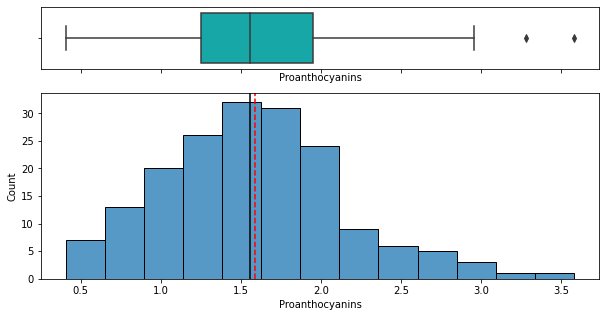

In [17]:
# ditribution of Proanthocyanins   
histogram_boxplot(df['Proanthocyanins'])

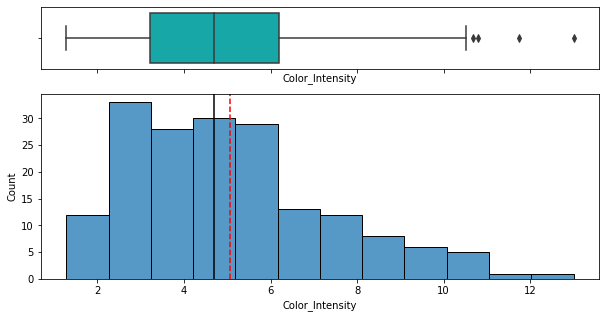

In [18]:
# ditribution of Color_Intensity   
histogram_boxplot(df['Color_Intensity'])

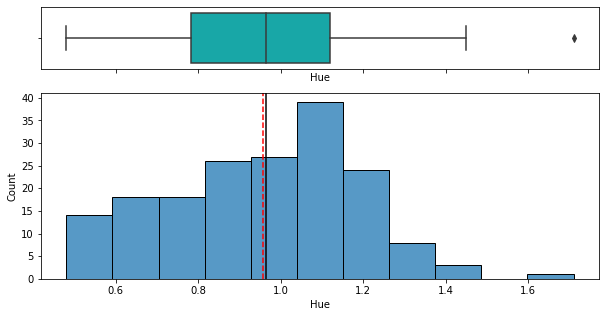

In [19]:
# ditribution of Hue   
histogram_boxplot(df['Hue'])

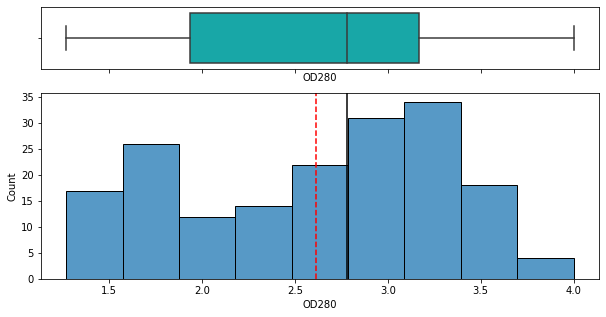

In [20]:
# ditribution of OD280   
histogram_boxplot(df['OD280'])

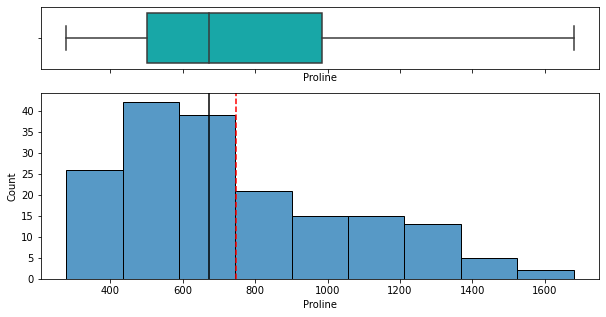

In [21]:
# ditribution of Proline   
histogram_boxplot(df['Proline'])

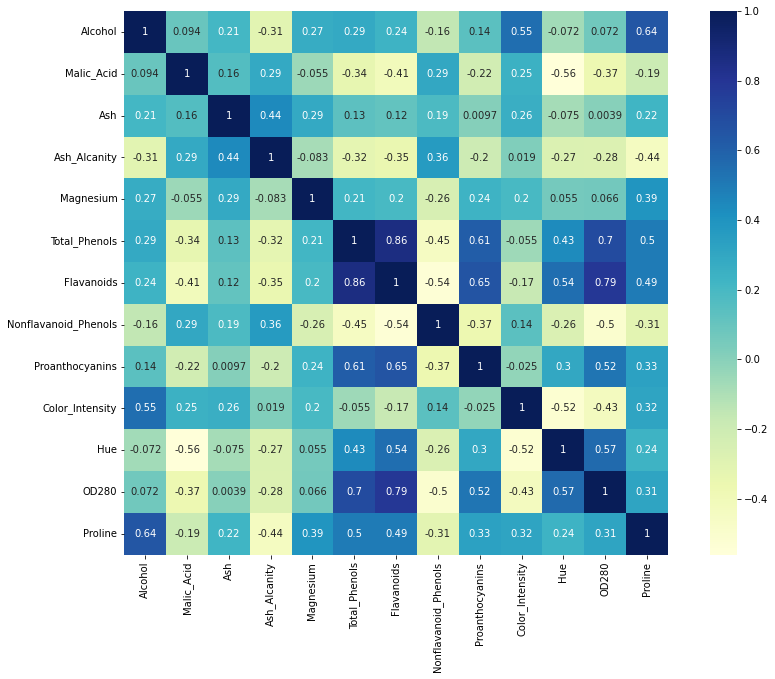

In [22]:
# Apply correlation plot to see the correlation between numerical variables.

plt.figure(figsize=(15,10))
# plt.figure(figsize=(14, 14))
dat_cor = df.corr()
sns.heatmap(dat_cor, cmap = 'YlGnBu', annot=True, square=True);

# preprocessing for data

In [23]:
data=df.copy()

In [24]:
data.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [25]:
sc=StandardScaler()

In [26]:
data_sc = sc.fit_transform(data)

In [27]:
data_sc 

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

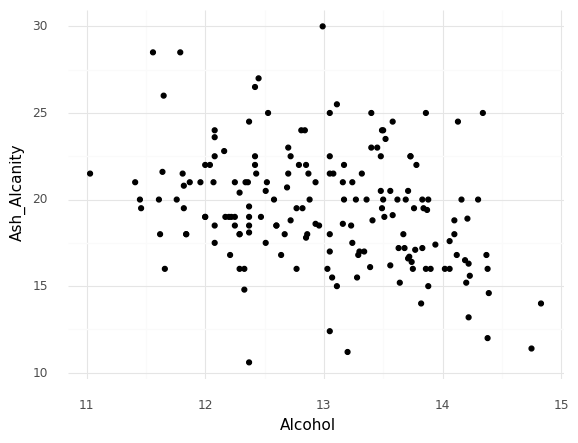

<ggplot: (179452868702)>

In [28]:
ggplot(data, aes(x = 'Alcohol', y = 'Ash_Alcanity')) + geom_point() + theme_minimal()

# KMeans

C:\Users\2021\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


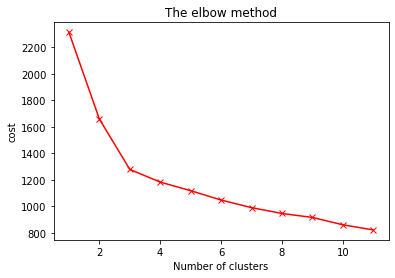

In [29]:
cost=[]

# Finding inertia on various k values
for i in range(1,12):
    kmeans=KMeans(n_clusters = i, init = 'random', 
                    max_iter = 100).fit(data_sc)
    cost.append(kmeans.inertia_)
    
plt.plot(range(1, 12), cost, 'x-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('cost') 
plt.show()

In [30]:
score = []
for n in range(2,12):
    kmean = KMeans(n_clusters= n )
    kmean.fit(data_sc)
    result = kmean.labels_
    print(n , '    '  , silhouette_score(data_sc , result))
    
    

2      0.26831340971052126
3      0.2848589191898987
4      0.26017035223704527
5      0.22703566914808432
6      0.1943027577586344
7      0.14179933403018488
8      0.13485697954947615
9      0.12689558666414769
10      0.14855883823129473
11      0.135102933453495


In [31]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100)

y_kmeans = kmeans.fit_predict(data_sc)

In [32]:
kmeans.n_iter_

3

In [33]:
index=kmeans.labels_

In [34]:
index

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

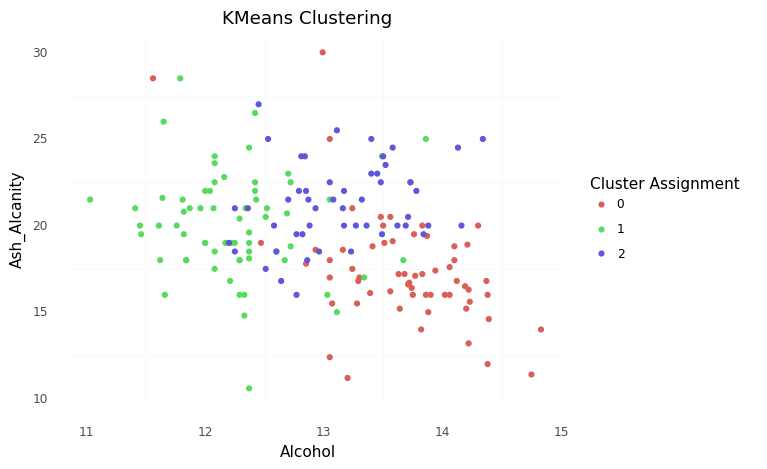

<ggplot: (179492492728)>

In [35]:
data["k_labels"] = kmeans.labels_
(ggplot(data, aes(x = "Alcohol", y = "Ash_Alcanity", color = "factor(k_labels)")) +
  geom_point() +
  theme_minimal() +
  scale_color_discrete(name = "Cluster Assignment")+
  theme(panel_grid_major = element_blank()) +
labs(title = "KMeans Clustering"))

In [36]:
print("silhouette_score is equal : ",silhouette_score(data_sc,index))

silhouette_score is equal :  0.2848589191898987


# Hierarchical and plot

In [37]:
data1=df.copy()

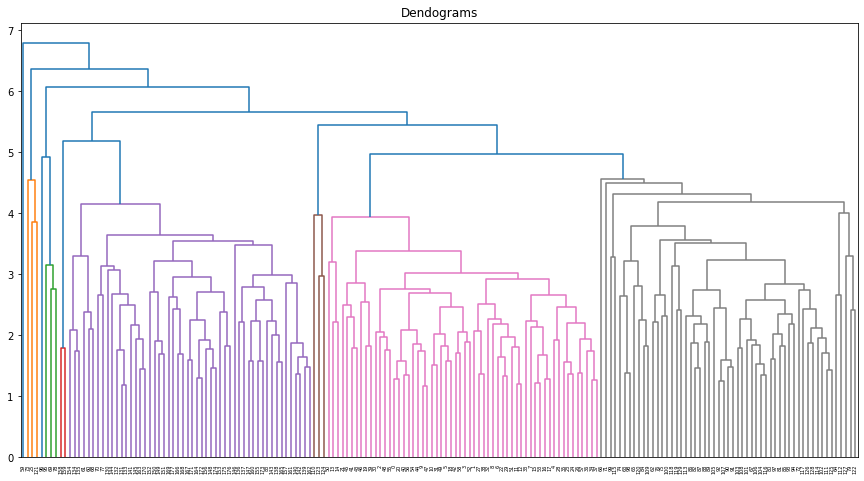

In [38]:
plt.figure(figsize=(15, 8))
plt.title("Dendograms")
dend = sch.dendrogram(sch.linkage(y=data_sc, method='average',metric='euclidean'),orientation='top') 

In [39]:
h1=AgglomerativeClustering(n_clusters=3)

In [40]:
h1.fit(data_sc)

AgglomerativeClustering(n_clusters=3)

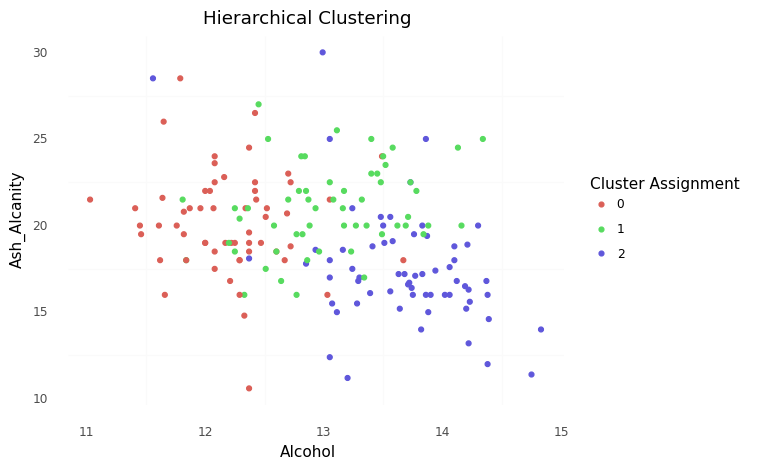

<ggplot: (179492450792)>

In [41]:
data1["h_labels"] = h1.labels_
(ggplot(data1, aes(x = "Alcohol", y = "Ash_Alcanity", color = "factor(h_labels)")) +
  geom_point() +
  theme_minimal() +
  scale_color_discrete(name = "Cluster Assignment")+
  theme(panel_grid_major = element_blank()) +
labs(title = "Hierarchical Clustering"))

In [42]:
print("silhouette_score is equal : ",silhouette_score(data_sc,h1.labels_))

silhouette_score is equal :  0.2774439826952265


# DBscan and plot

In [43]:
data2=df.copy()

In [44]:
data_sc

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

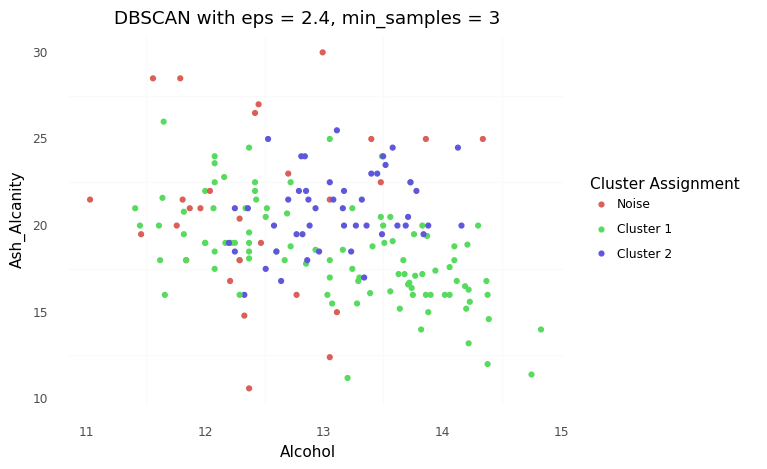

<ggplot: (179492471001)>

In [45]:
db1 = DBSCAN(eps = 2.4, min_samples =3 ).fit(data_sc)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

data2["assignments"] = db1.labels_

(ggplot(data2, aes(x = 'Alcohol', y = 'Ash_Alcanity', color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 2.4, min_samples = 3"))

In [46]:
print("silhouette_score is equal : ",silhouette_score(data_sc,db1.labels_))

silhouette_score is equal :  0.2143683585627416


# GaussianMixture

In [47]:
data3=df.copy()

In [48]:
GM = GaussianMixture(3)

In [49]:
GM.fit(data_sc)

GaussianMixture(n_components=3)

In [50]:
data3["GM"] = GM.predict(data_sc)

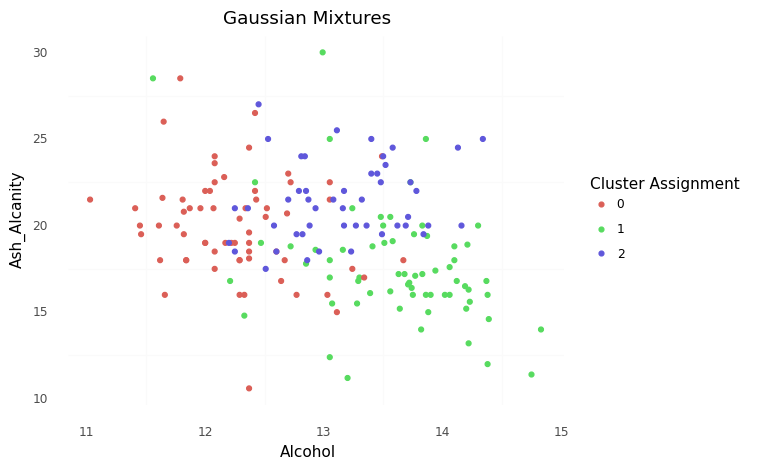

<ggplot: (179491098215)>

In [51]:
(ggplot(data3, aes(x = 'Alcohol', y = 'Ash_Alcanity',color = "factor(GM)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment") +
 theme(panel_grid_major = element_blank()) + 
 labs(title = "Gaussian Mixtures"))

In [52]:
print("silhouette_score is equal : ",silhouette_score(data_sc,data3["GM"]))

silhouette_score is equal :  0.2691288473033129
